# 1. Dane i ich modele przetwarzania
## 1.1 Dane w pythonie

In [1]:
klient = [38, 'Kawaler',1, 56.3]

In [2]:
type(klient)

list

In [3]:
a = [1,2,3]
b = [4,5,6]
print(f"a+b: {a+b}")

a+b: [1, 2, 3, 4, 5, 6]


In [4]:
try:
    print(a*b)
except TypeError:
    print("operacja niezdefiniowana")

operacja niezdefiniowana


In [5]:
import numpy as np
aa = np.array([1,2,3])
bb = np.array([4,5,6])

type(aa)

numpy.ndarray

In [6]:
print(f"aa+bb: {aa+bb}")

aa+bb: [5 7 9]


In [7]:
try:
    print(aa*bb)
except TypeError:
    print("operacja niezdefiniowana")

[ 4 10 18]


In [8]:
x = np.array(range(4))
x

array([0, 1, 2, 3])

In [9]:
x.shape

(4,)

In [10]:
A = np.array([range(4),range(4)])
A

array([[0, 1, 2, 3],
       [0, 1, 2, 3]])

In [11]:
A.shape

(2, 4)

In [12]:
A.T

array([[0, 0],
       [1, 1],
       [2, 2],
       [3, 3]])

In [13]:
from sklearn.datasets import load_iris
iris = load_iris()

In [14]:
type(iris)

sklearn.utils.Bunch

In [15]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [16]:
import numpy as np
import pandas as pd
pd.set_option('display.precision',2)

df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                  columns= iris['feature_names'] + ['target'])
                  
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [17]:
# nowa kolumna
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [18]:
# usuniecie kolumny
df = df.drop(columns=['target'])

In [19]:
# pierwsze wiersze
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [20]:
# ostatnie wiersze
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [21]:
# podstawowe informacje
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [22]:
# podstawowe statystyki 
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [23]:
# filtrowanie danych
X = df.iloc[:100,[0,2]].values 
# pierwsze sto wierszy + kolumna 0 i 2, 

In [24]:

# values- zamienia DataFrame na np.array
y = df.iloc[:100,4].values

In [25]:
# unikalne wartosci
y.unique()

['setosa', 'versicolor']
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [26]:
# przetwarzanie warunkowe
y = np.where(y == 'setosa',-1,1)

In [27]:
import matplotlib.pyplot as plt

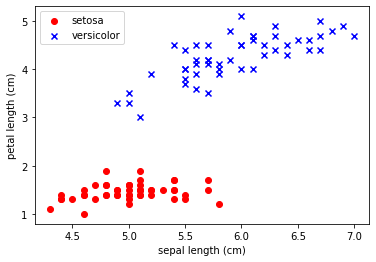

In [28]:
plt.scatter(X[:50,0],X[:50,1],color='red', marker='o',label='setosa')
plt.scatter(X[50:100,0],X[50:100,1],color='blue', marker='x',
label='versicolor')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.legend(loc='upper left')
plt.show()

In [29]:
import numpy as np
from keras.datasets import mnist

(X_train, y_train),(X_test, y_test) = mnist.load_data()

X_train.shape

(60000, 28, 28)

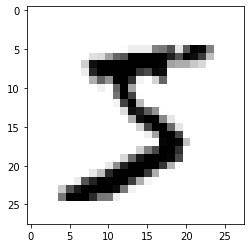

In [30]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap=plt.cm.binary)

In [31]:
from fastai.vision.all import *

In [32]:
path = untar_data(URLs.MNIST_SAMPLE)
# wybierz trojke
thress = (path/'train'/'3').ls().sorted()
im3_path = thress[1]
im3 = Image.open(im3_path)
# zapisz obraz jako tensor i wytnij czesc
im3_t = tensor(im3)[4:15,4:22]

In [33]:
im3_df = pd.DataFrame(im3_t)
im3_df.style.set_properties(**{'font-size':'6pt'})\
.background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [34]:
import numpy as np
from keras.datasets import cifar10

(X_train, y_train),(X_test, y_test) = cifar10.load_data()
# rozmiar 
X_train.shape

(50000, 32, 32, 3)

In [35]:
import numpy as np
skalar = np.array(5)
print(skalar.ndim)

0


In [36]:
wektor_1d = np.array([3, 5, 7])
print(wektor_1d.ndim)

1


In [37]:
macierz_2d = np.array([[1,2],[3,4]])
print(macierz_2d.ndim)

2


In [38]:
import torch 
a = torch.tensor([1,2,3])
b = torch.tensor([3,4,5])
c = a+b
print(c)

tensor([4, 6, 8])


In [39]:
d = torch.tensor([[1,2,3],[3,4,5]])
d.size()


torch.Size([2, 3])

In [40]:
d.T

tensor([[1, 3],
        [2, 4],
        [3, 5]])

In [41]:
device = "cuda" if torch.cuda.is_available() else "cpu"

x = torch.tensor([[1,2,3],[4,5,6]], device=device)
x.device

device(type='cpu')

## Podłączenie do Apache Spark

Sprawdź rozdział 3

In [42]:
import findspark
findspark.init('/Users/air/Desktop/spark')

In [43]:
from pyspark import SparkContext

sc = SparkContext(master='local[*]', appName="book app")

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/02/05 18:33:11 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [44]:
sc

<SparkContext master=local[*] appName=book app>

In [45]:
rdd = sc.parallelize(range(10))

In [46]:
rdd

PythonRDD[1] at RDD at PythonRDD.scala:53

In [47]:
# pierwszy element
rdd.first()

0

In [48]:
# pierwsze dwa elementy
rdd.take(2)

[0, 1]

In [49]:
# losowe elementy v1
rdd.takeSample(True,3)

[6, 3, 6]

In [50]:
# losowe elementy v2
rdd.takeSample(False,3)

[3, 0, 2]

In [51]:
rdd.count()

10

In [52]:
rdd.mean()

4.5

In [53]:
rdd.reduce(lambda x,y: x+y)

45

In [54]:
rdd.sum()

45

In [55]:
rdd2 = rdd.map(lambda x: x*x)
rdd2.collect()

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [56]:
rdd3 = rdd.map(lambda x: [x,x])
rdd3.collect()

[[0, 0],
 [1, 1],
 [2, 2],
 [3, 3],
 [4, 4],
 [5, 5],
 [6, 6],
 [7, 7],
 [8, 8],
 [9, 9]]

In [57]:
rdd4 = rdd.flatMap(lambda x: [x,x])
rdd4.collect()

[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9]

In [58]:
sc.parallelize(range(20)) \
.map(lambda x: x * 2) \
.filter(lambda x: x != 2) \
.reduce(lambda x,y: x + y)

378

In [59]:
%%file example.txt
first 
second line 
the third line 
then a fourth line

Overwriting example.txt


In [60]:
text_rdd = sc.textFile('example.txt')

In [61]:
text_rdd.first()


'first '

In [62]:

text_rdd.take(3)

['first ', 'second line ', 'the third line ']

In [63]:
text_rdd.takeSample(True,2)

['second line ', 'first ']

In [64]:
text_rdd.count()

4

In [65]:
text_rdd.map(lambda line: line.split()).collect()

[['first'],
 ['second', 'line'],
 ['the', 'third', 'line'],
 ['then', 'a', 'fourth', 'line']]

In [66]:
def nasza_fun(line):
    return line.split()

In [67]:
text_rdd.map(nasza_fun).collect()

[['first'],
 ['second', 'line'],
 ['the', 'third', 'line'],
 ['then', 'a', 'fourth', 'line']]

In [68]:
import re
sc.textFile("example.txt") \
.map(lambda x: re.findall(r"[a-z']+", x.lower())) \
.flatMap(lambda x: [(y, 1) for y in x]) \
.reduceByKey(lambda x,y: x + y) \
.collect()

[('line', 3),
 ('third', 1),
 ('fourth', 1),
 ('first', 1),
 ('second', 1),
 ('the', 1),
 ('then', 1),
 ('a', 1)]

In [69]:
import requests
requests.get('https://sebastianzajac.pl')

<Response [200]>

In [70]:
import requests
import json

def pobierz_info_slowa(slowo):
  language = 'en-gb'
  headers = {"app_id":"c7f6d128",
             "app_key":"73ea2ed8109721300050137e74044fa6"}
  url_1 = "https://od-api.oxforddictionaries.com:443/api/v2/entries/"
  url = f"{url_1}{language}/{slowo.lower()}"
  return requests.get(url, headers=headers)

In [71]:
odp = pobierz_info_slowa('streaming')
print(odp.text)

{
    "id": "streaming",
    "metadata": {
        "operation": "retrieve",
        "provider": "Oxford University Press",
        "schema": "RetrieveEntry"
    },
    "results": [
        {
            "id": "streaming",
            "language": "en-gb",
            "lexicalEntries": [
                {
                    "entries": [
                        {
                            "grammaticalFeatures": [
                                {
                                    "id": "mass",
                                    "text": "Mass",
                                    "type": "Countability"
                                }
                            ],
                            "pronunciations": [
                                {
                                    "audioFile": "https://audio.oxforddictionaries.com/en/mp3/streaming_gb_2.mp3",
                                    "dialects": [
                                        "British English"
                  

In [72]:
odp.headers

{'Date': 'Sat, 05 Feb 2022 17:33:29 GMT', 'Content-Type': 'application/json;charset=utf-8', 'Content-Length': '12038', 'Connection': 'keep-alive', 'Server': 'openresty', 'X-Request-Id': '1-61feb4e9-5bf335943b4f1cca4df605da', 'code_version': 'v2.8.8.0-0-g522bb6a', 'api_version': 'v2'}

In [73]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('newApp').getOrCreate()


In [74]:
json_rdd = sc.parallelize([odp.text])
df_sp = spark.read.json(json_rdd)
df_sp.show(truncate=False)

+---------+--------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [75]:
words = ["cogent", "digress", "tangible",
"diligent", "mellifluous", "obscure", "intelligible"]
lista_odp = [pobierz_info_slowa(word).text for word in words]
json_rdd = sc.parallelize(lista_odp)
json_df = spark.read.json(json_rdd)
json_df.show()

+------------+--------------------+--------------------+------------+
|          id|            metadata|             results|        word|
+------------+--------------------+--------------------+------------+
|      cogent|{retrieve, Oxford...|[{cogent, en-gb, ...|      cogent|
|     digress|{retrieve, Oxford...|[{digress, en-gb,...|     digress|
|    tangible|{retrieve, Oxford...|[{tangible, en-gb...|    tangible|
|    diligent|{retrieve, Oxford...|[{diligent, en-gb...|    diligent|
| mellifluous|{retrieve, Oxford...|[{mellifluous, en...| mellifluous|
|     obscure|{retrieve, Oxford...|[{obscure, en-gb,...|     obscure|
|intelligible|{retrieve, Oxford...|[{intelligible, e...|intelligible|
+------------+--------------------+--------------------+------------+



In [76]:
json_df.printSchema()

root
 |-- id: string (nullable = true)
 |-- metadata: struct (nullable = true)
 |    |-- operation: string (nullable = true)
 |    |-- provider: string (nullable = true)
 |    |-- schema: string (nullable = true)
 |-- results: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- id: string (nullable = true)
 |    |    |-- language: string (nullable = true)
 |    |    |-- lexicalEntries: array (nullable = true)
 |    |    |    |-- element: struct (containsNull = true)
 |    |    |    |    |-- derivatives: array (nullable = true)
 |    |    |    |    |    |-- element: struct (containsNull = true)
 |    |    |    |    |    |    |-- id: string (nullable = true)
 |    |    |    |    |    |    |-- text: string (nullable = true)
 |    |    |    |    |-- entries: array (nullable = true)
 |    |    |    |    |    |-- element: struct (containsNull = true)
 |    |    |    |    |    |    |-- etymologies: array (nullable = true)
 |    |    |    |    |    |    |    

In [77]:
json_df.select('metadata.*').printSchema()

root
 |-- operation: string (nullable = true)
 |-- provider: string (nullable = true)
 |-- schema: string (nullable = true)



In [78]:
json1 = """
{
"num": [1,2,3,4]
}
"""

In [79]:
df1 = spark.read.json(sc.parallelize([json1]))
df1.printSchema()

root
 |-- num: array (nullable = true)
 |    |-- element: long (containsNull = true)



In [80]:
from pyspark.sql.functions import *

df1.select(explode('num').alias('number')).show()

+------+
|number|
+------+
|     1|
|     2|
|     3|
|     4|
+------+



In [81]:
json_df.createOrReplaceTempView('slownik')

In [82]:
flat_df = spark.sql("""select id as word, 
a.language
from slownik
lateral view outer explode(results)tmp1 as a
""")
flat_df.show()

+------------+--------+
|        word|language|
+------------+--------+
|      cogent|   en-gb|
|     digress|   en-gb|
|    tangible|   en-gb|
|    diligent|   en-gb|
| mellifluous|   en-gb|
|     obscure|   en-gb|
|intelligible|   en-gb|
+------------+--------+



In [83]:
flat_df2 = spark.sql("""select id as word, 
a.language, b
from slownik
lateral view outer explode(results)tmp1 as a
lateral view outer explode(a.lexicalEntries)tmp2 as b
""")

In [84]:
flat_df3 = spark.sql("""select id as word, 
a.language, definitions as definition,
examples.text as example
from slownik
lateral view outer explode(results)tmp1 as a
lateral view outer explode(a.lexicalEntries)tmp2 as b
lateral view outer explode(b.entries)tmp3 as c
lateral view outer explode(c.senses)tmp4 as d
lateral view outer explode(d.definitions)tmp5 as definitions
lateral view outer explode(d.examples)tmp6 as examples
""")

## 1.2. Żródła i przechowywanie danych

In [85]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [86]:
from sqlalchemy import create_engine

In [87]:
engine = create_engine('sqlite:///irysy.db')
# zapis ramki do bazy SQL
df.to_sql('dane', con=engine, index=False)

150

In [88]:
a = engine.execute("SELECT * FROM dane").fetchall()
df2 = pd.DataFrame(a, columns=df.columns)
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [89]:
import json
person = '{"name": "Alice", "languages": ["English", "French"]}'
person_dict = json.loads(person)

print( person_dict)

{'name': 'Alice', 'languages': ['English', 'French']}


In [90]:
print(person_dict['languages'])

['English', 'French']


In [93]:
%%file test.json
{"name": "Alice", "languages": ["English", "French"]}

Writing test.json


In [94]:
with open('test.json') as f:
    data = json.load(f)

print(data)

{'name': 'Alice', 'languages': ['English', 'French']}


In [95]:
with open('person.json', 'w') as json_file:
    json.dump(person_dict, json_file)

In [96]:
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier

X, y = datasets.make_classification(n_samples=10**5,
n_features=20, n_informative=2, n_redundant=2)
                                    
train_samples = 100 

X_train = X[:train_samples]
X_test = X[train_samples:]
y_train = y[:train_samples]
y_test = y[train_samples:]

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [97]:
import pickle

In [98]:
with open('model.pkl', "wb") as picklefile:
    pickle.dump(rfc, picklefile)

In [99]:
with open('model.pkl',"rb") as picklefile:
    model = pickle.load(picklefile)

In [100]:
from joblib import dump, load

In [101]:
with open('model.joblib', "wb") as jobf:
    dump(rfc, jobf)

In [102]:
with open('model.joblib',"rb") as jobf:
    model = load(jobf)

## 1.3. Dane i Metadane

In [104]:
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
import json

In [110]:
dane = {'temp':[15.2, 10, 13, 10, 12, 10],
        'deszcz':[2.5, 0.2, 0.6, 0.3, 1.8, 0.2]}
df = pd.DataFrame(dane)
df.index = pd.DatetimeIndex(['2021-10-01', '2021-10-02',
    '2021-10-03', '2021-10-04', '2021-10-05', '2021-10-06'], name="data")

In [112]:
meta_dane = {'czas_zapisu': '2021-10-10T10:10:59',
'user':'Sebastian Zajac', 'wsp':'52.143 N, 21.1554 E'}

In [114]:
meta_dane_key = 'pogoda.iot'

In [116]:
tabela_A = pa.Table.from_pandas(df)
print(tabela_A.schema.metadata)

{b'pandas': b'{"index_columns": ["data"], "column_indexes": [{"name": null, "field_name": null, "pandas_type": "unicode", "numpy_type": "object", "metadata": {"encoding": "UTF-8"}}], "columns": [{"name": "temp", "field_name": "temp", "pandas_type": "float64", "numpy_type": "float64", "metadata": null}, {"name": "deszcz", "field_name": "deszcz", "pandas_type": "float64", "numpy_type": "float64", "metadata": null}, {"name": "data", "field_name": "data", "pandas_type": "datetime", "numpy_type": "datetime64[ns]", "metadata": null}], "creator": {"library": "pyarrow", "version": "7.0.0"}, "pandas_version": "1.4.0"}'}


In [117]:
meta_json = json.dumps(meta_dane)

In [118]:
istniejace_metadane = tabela_A.schema.metadata
all_metadane = {meta_dane_key.encode() : meta_json.encode(),
**istniejace_metadane}

In [119]:
tabela_A_md = tabela_A.replace_schema_metadata(all_metadane)
pq.write_table(tabela_A_md, 'przyklad.parquet',
compression='GZIP')

In [120]:
tabela = pq.read_table('przyklad.parquet')
df2 = tabela.to_pandas()

In [121]:
moje_meta_dane = tabela.schema.metadata[meta_dane_key.encode()]
m_m_d = json.loads(moje_meta_dane)

## 1.5. Obiektowośc Pythona a dane

### 1.5.1. Klasa 0 - Pusta klasa

In [126]:
def moja_funkcja():
    pass

In [127]:
class Nazwa(object):
    pass

In [128]:
a = Nazwa()
b = Nazwa()

In [129]:
[Nazwa() for x in range(5)]

In [130]:
b.__dir__()

['__module__',
 '__dict__',
 '__weakref__',
 '__doc__',
 '__repr__',
 '__hash__',
 '__str__',
 '__getattribute__',
 '__setattr__',
 '__delattr__',
 '__lt__',
 '__le__',
 '__eq__',
 '__ne__',
 '__gt__',
 '__ge__',
 '__init__',
 '__new__',
 '__reduce_ex__',
 '__reduce__',
 '__subclasshook__',
 '__init_subclass__',
 '__format__',
 '__sizeof__',
 '__dir__',
 '__class__']

In [131]:
'napis'.__dir__()

['__repr__',
 '__hash__',
 '__str__',
 '__getattribute__',
 '__lt__',
 '__le__',
 '__eq__',
 '__ne__',
 '__gt__',
 '__ge__',
 '__iter__',
 '__mod__',
 '__rmod__',
 '__len__',
 '__getitem__',
 '__add__',
 '__mul__',
 '__rmul__',
 '__contains__',
 '__new__',
 'encode',
 'replace',
 'split',
 'rsplit',
 'join',
 'capitalize',
 'casefold',
 'title',
 'center',
 'count',
 'expandtabs',
 'find',
 'partition',
 'index',
 'ljust',
 'lower',
 'lstrip',
 'rfind',
 'rindex',
 'rjust',
 'rstrip',
 'rpartition',
 'splitlines',
 'strip',
 'swapcase',
 'translate',
 'upper',
 'startswith',
 'endswith',
 'isascii',
 'islower',
 'isupper',
 'istitle',
 'isspace',
 'isdecimal',
 'isdigit',
 'isnumeric',
 'isalpha',
 'isalnum',
 'isidentifier',
 'isprintable',
 'zfill',
 'format',
 'format_map',
 '__format__',
 'maketrans',
 '__sizeof__',
 '__getnewargs__',
 '__doc__',
 '__setattr__',
 '__delattr__',
 '__init__',
 '__reduce_ex__',
 '__reduce__',
 '__subclasshook__',
 '__init_subclass__',
 '__dir__',
 '__

### 1.5.2. Klasa 1 - rzut kością

In [136]:
from random import randint

class Kosc(object):
    """
    Klasa realizująca pojedynczy rzut kością
    
    Atributes
    ---------
    sciany : int, optional
        liczba ścian losowej kości (default is 6)
    
    Methods
    -------
    roll() :
        zwraca losową wartość od 1 do liczby ścian 
    """
    def __init__(self, sciany: int=6):
        """
        Parameters
        ----------
        sciany : int
            liczba ścian kości
        """

        self.sciany = sciany

    def roll(self):
        '''
        Zwraca losową liczbę naturalną od 1 do liczby ścian
        Return
        ------
        losowa wartość ściany kości
        '''
        return randint(1,self.sciany)

In [137]:
kosc = Kosc() # stwórz kość

In [138]:
results = []
for _ in range(10): # powtórz 10 razy
    result = kosc.roll() # rzuć kością raz
    results.append(result) # zapisz do listy

print(results)

[2, 6, 4, 5, 5, 4, 6, 1, 6, 4]


### 1.5.3. Klasa 2 - błądzenie losowe

In [141]:
from random import choice

class RandomWalk(object):
    """
    Klasa generująca błądzenie losowego w 2D

    Atributes
    ---------
    num_points : int
        liczba ścian losowej kości
    
    Methods
    -------
    fill_walk()) :
        zwraca realizację błądzenia losowego na płaszczyźnie
    """
    
    def __init__(self, num_points: int=5000):
        """
        Parameters
        ----------
        num_points : int, optional
            liczba kroków
        x_values : list 
            lista losowych połozen x
            początkowo punkt 0
        y_values : list
            lista losowych połozen y
            początkowo punkt 0
        """
        self.num_points = num_points
        self.x_values = [0]
        self.y_values = [0]

    def fill_walk(self):
        '''
        Zwraca wygenerowany przypadek bładzenia losowego
        Return
        ------
        listy x_values i y_values
        '''
        while len(self.x_values) < self.num_points:
            x_direction = choice([-1,1])
            x_distance = choice([0,1,2,3,4])
            x_step = x_direction*x_distance

            y_direction = choice([-1,1])
            y_distance = choice([0,1,2,3,4])
            y_step = y_direction*y_distance

            if x_step == 0 and y_step == 0:
                continue

            next_x = self.x_values[-1] + x_step
            next_y = self.y_values[-1] + y_step

            self.x_values.append(next_x)
            self.y_values.append(next_y)

In [142]:
rw = RandomWalk(50000)
rw.fill_walk()

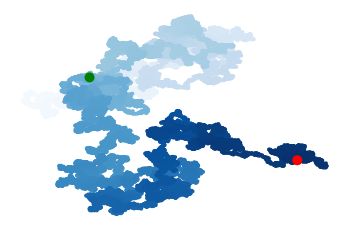

In [153]:
point_number = list(range(rw.num_points))
plt.scatter(rw.x_values, rw.y_values, c=point_number, cmap=plt.cm.Blues, edgecolor='none', s=15)
plt.scatter(0, 0, c='green', edgecolor='none', s=100)
plt.scatter(rw.x_values[-1], rw.y_values[-1], c='red', edgecolor='none', s=100)
plt.axis('off')
plt.show()

### 1.5.4. Obiekty i bazy danych

In [154]:
from sqlalchemy import create_engine
from sqlalchemy import Column, String, Integer
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker

In [155]:
engine = create_engine('sqlite:///irysy.db')
base = declarative_base()

In [156]:
class Transakcje(base):
    """Tabela danych"""
    __tablename__ = 'transakcje'
    transakcja_id = Column(Integer, primary_key=True )
    data = Column(String)
    przedmiot_id = Column(Integer)
    cena = Column(Integer)

    def __init__(self, transakcja_id, data, przedmiot_id, cena):
        self.transakcja_id = transakcja_id
        self.data = data
        self.przedmiot_id = przedmiot_id
        self.cena = cena

In [157]:
base.metadata.create_all(engine)

from sqlalchemy.orm import sessionmaker
# Stworzenie nowej sesji
Session = sessionmaker(bind=engine)
session = Session()

In [158]:
for t in range(10):
    tr = Transakcje(t, f'200{t}/05/06', t**2-t*2, 19)
    session.add(tr)
# zapis zmian w bazie danych
session.commit()

In [159]:
for s in session.query(Transakcje).all():
    print(s.transakcja_id, s.data, s.cena)

0 2000/05/06 19
1 2001/05/06 19
2 2002/05/06 19
3 2003/05/06 19
4 2004/05/06 19
5 2005/05/06 19
6 2006/05/06 19
7 2007/05/06 19
8 2008/05/06 19
9 2009/05/06 19


In [160]:
# wybrane transakcje
for s in session.query(Transakcje).filter(Transakcje.transakcja_id>5):
    print(s.transakcja_id, s.data)

6 2006/05/06
7 2007/05/06
8 2008/05/06
9 2009/05/06


### 1.5.5. Obiektowoś w pakiecie Scikit-Learn

In [161]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [162]:
numeric_features = ["zm1", "zm2"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])
categorical_features = ["zm3", "zm4"]
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(transformers=[
    ("num_trans", numeric_transformer, numeric_features),
    ("cat_trans", categorical_transformer, categorical_features)
])